In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
# import datetime as dt
import scipy.stats as st
from sklearn.linear_model import LinearRegression

In [2]:
#Reading CSVs
m_data = pd.read_csv('Environment_Temperature_change_filtered_Mdata.csv')
y_data = pd.read_csv('Environment_Temperature_change_filtered_Ydata.csv')
#Dropping unncessary columns (Meteorlogical Year)
y_data1 = y_data.drop(['Area Code','Months Code','Element Code','Element','Unit','Area','Months'], axis=1)
#Meteorlogical Year Mean Temperature Changes (Transposed)
y_data2 = y_data1.transpose()
y_data2.columns = ['South America','Northern America']
y_data2 = y_data2.drop(['YearSpanAvg'], axis=0)
#y_data2

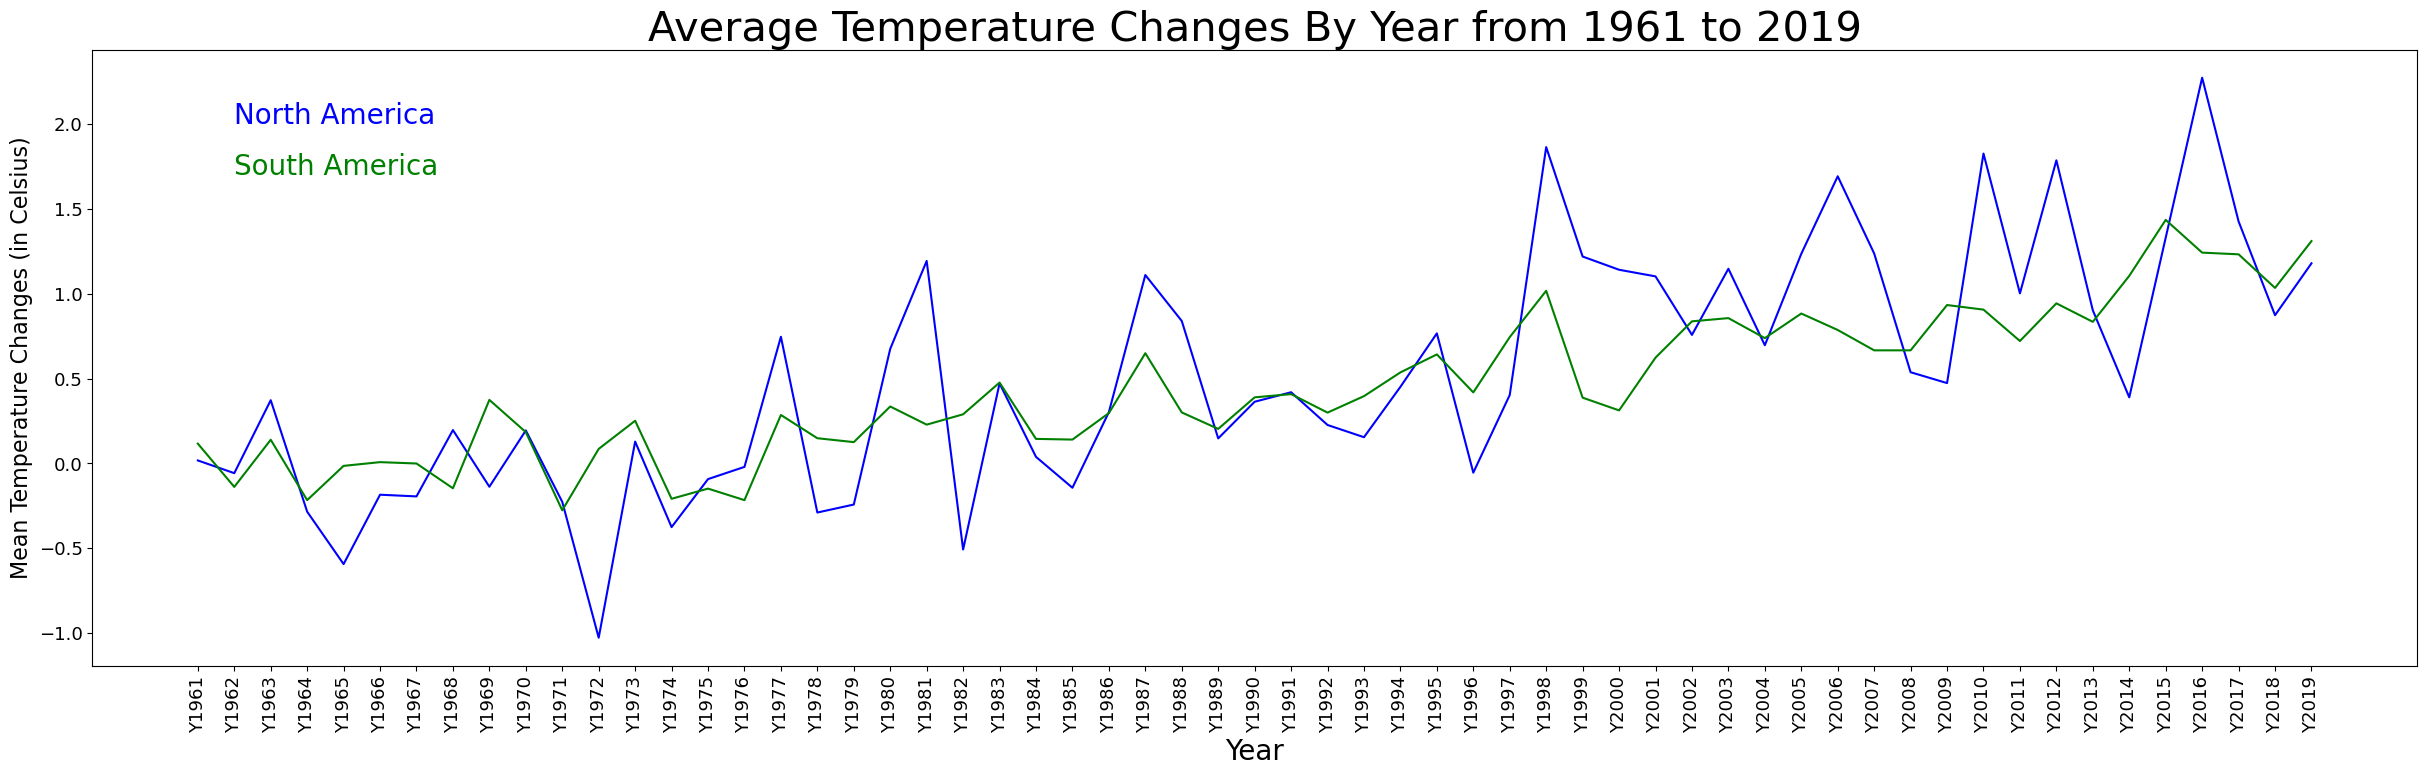

In [7]:
#Plot Meteorological year (should evaluate w linear regression)
fig = plt.figure(figsize=(30, 8))
plt.plot(y_data2['Northern America'],color='blue')
plt.plot(y_data2['South America'],color='green')
plt.xlabel('Year', fontsize = 20)
plt.ylabel("Mean Temperature Changes (in Celsius)", fontsize = 16)
plt.title("Average Temperature Changes By Year from 1961 to 2019", fontsize = 30)
plt.xticks(fontsize=13)
plt.xticks(rotation=90)
plt.yticks(fontsize=13)
plt.annotate('North America', (1,2), color = "blue", fontsize=20)
plt.annotate('South America', (1,1.7), color = "green", fontsize=20)
plt.show()

In [8]:
#Isolated NA from y_data2 for linear regression
#fig = plt.figure(figsize=(30, 8))
#plt.plot(y_data2['Northern America'])
#plt.xlabel('Years', fontsize = 16)
#plt.ylabel("Mean Temperature Changes (in Celsius)", fontsize = 16)
#plt.title("Average Temperature Change By Meteorological Year 1961 to 2019 (NA)", fontsize = 30)
#plt.xticks(rotation=90)
#plt.show()
#Regression

The equation of the line is: y = 0.03x + -59.20


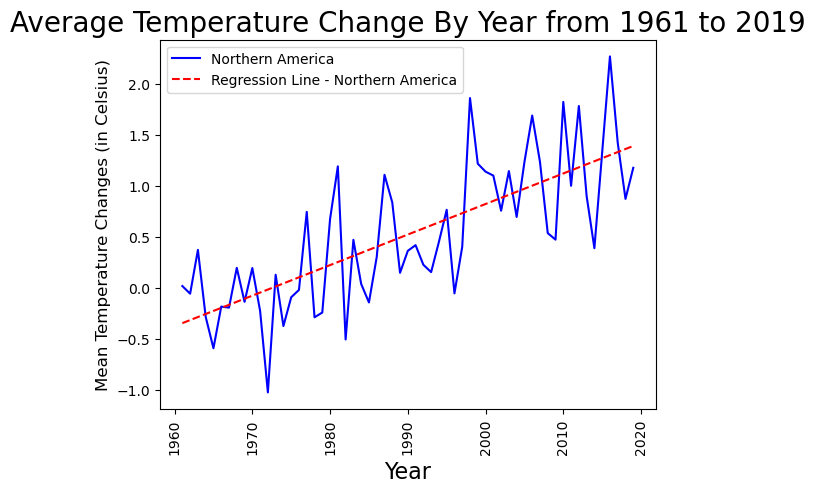

In [11]:
# Convert the 'Year' column to integers by removing the 'Y' prefix
y_data2['Year'] = y_data2.index.str.replace('Y', '').astype(int)

# Plot the data points for 'Northern America'

plt.plot(y_data2['Year'], y_data2['Northern America'], label='Northern America', color='blue')

# Linear regression for 'Northern America'
X = y_data2['Year'].values.reshape(-1, 1)
y1 = y_data2['Northern America'].values
regressor1 = LinearRegression()
regressor1.fit(X, y1)
m1 = regressor1.coef_[0]
b1 = regressor1.intercept_

# Print the equation of the line
print(f"The equation of the line is: y = {m1:.2f}x + {b1:.2f}")

y1_pred = regressor1.predict(X)

plt.plot(y_data2['Year'], y1_pred, label='Regression Line - Northern America', color='red', linestyle='dashed')
plt.xlabel('Year', fontsize = 16)
plt.ylabel("Mean Temperature Changes (in Celsius)", fontsize = 12)
plt.title("Average Temperature Change By Year from 1961 to 2019", fontsize = 20)
plt.xticks(rotation=90) #range(1961,2020)

plt.legend()
plt.show()

In [12]:
#Isolated SA from y_data2 for linear regression
#fig = plt.figure(figsize=(30, 8))
#plt.plot(y_data2['South America'])
#plt.xlabel('Years', fontsize = 16)
#plt.ylabel("Mean Temperature Changes (in Celsius)",fontsize = 16)
#plt.title("Average Temperature Change By Meteorological Year 1961 to 2019 (SA)", fontsize = 30)
#plt.xticks(rotation=90)
#Regression

#plt.show()

The equation of the line is: y = 0.02x + -44.01


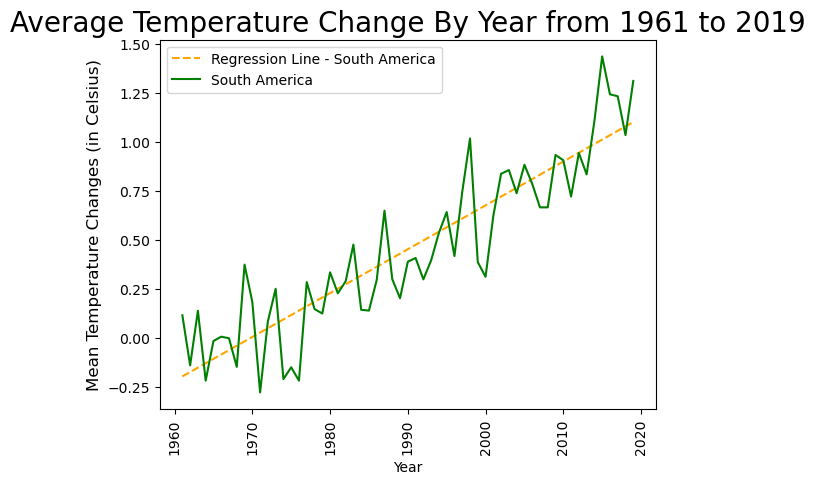

In [13]:
# Convert the 'Year' column to integers by removing the 'Y' prefix
y_data2['Year'] = y_data2.index.str.replace('Y', '').astype(int)

# Linear regression for 'South America'
y2 = y_data2['South America'].values
regressor2 = LinearRegression()
regressor2.fit(X, y2)

m2 = regressor2.coef_[0]
b2 = regressor2.intercept_

# Print the equation of the line
print(f"The equation of the line is: y = {m2:.2f}x + {b2:.2f}")

y2_pred = regressor2.predict(X)
plt.plot(y_data2['Year'], y2_pred, label='Regression Line - South America', color='orange', linestyle='dashed')

# Plot the data points for 'South America'
plt.plot(y_data2['Year'], y_data2['South America'], label='South America', color='green')

plt.xlabel('Year')
plt.ylabel("Mean Temperature Changes (in Celsius)", fontsize = 12)
plt.title("Average Temperature Change By Year from 1961 to 2019", fontsize = 20)
plt.xticks(rotation=90) #range(1961,2020),
plt.legend()
plt.show()

In [14]:
m_data1 = m_data.dropna(axis=0, how='all')
m_data1 = m_data1.drop(['Area Code','Months Code','Element Code','Element','Unit'], axis=1)
#Monthly Mean Temperature Changes (Raw)
m_data1.head()

,Area,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,YearSpanAvg
0,South America,January,0.015,-0.154,-0.022,0.227,-0.292,0.299,-0.142,-0.149,...,0.702,0.662,1.050,0.963,1.149,1.571,1.157,0.914,1.230,0.431
2,South America,February,-0.128,-0.021,-0.131,0.180,0.059,-0.306,-0.136,-0.251,...,0.467,0.541,0.746,0.580,0.837,1.774,0.972,0.825,1.149,0.376
4,South America,March,-0.098,0.192,-0.086,-0.261,-0.523,0.019,-0.317,-0.468,...,0.318,0.676,0.601,0.494,1.122,1.357,0.922,0.988,0.952,0.414
6,South America,April,0.064,-0.109,0.305,0.204,-0.148,0.269,0.293,-0.750,...,0.942,0.937,1.024,1.022,1.587,1.491,1.015,1.548,1.609,0.587
8,South America,May,0.499,-0.406,-0.152,0.045,-0.186,0.209,0.901,-0.968,...,0.529,0.993,0.961,0.947,1.384,0.740,1.472,1.190,1.479,0.448


In [15]:
#Splitting DataFrame into two separate frames based on region
m_data_na = m_data1[m_data1['Area']=='Northern America']
m_data_sa = m_data1[m_data1['Area']=='South America']
#North America Monthly Mean Temp Changes
m_data_na.head()

,Area,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,YearSpanAvg
32,Northern America,January,0.699,-0.515,-0.618,1.222,0.084,-2.178,1.111,-0.465,...,1.960,2.216,2.024,2.418,1.927,4.029,3.629,2.110,1.717,1.001
34,Northern America,February,0.684,-0.845,0.644,0.689,-1.880,0.057,-1.604,-0.083,...,0.358,3.370,1.569,-0.589,-0.797,3.244,3.050,0.739,-0.535,0.648
36,Northern America,March,-0.243,0.481,-0.052,-2.683,-0.465,0.832,-0.347,2.046,...,0.753,2.997,1.237,-0.694,1.957,3.381,1.193,2.016,2.248,0.931
38,Northern America,April,-0.700,-0.152,0.896,-0.786,0.347,-0.847,-0.936,0.142,...,-0.148,1.815,-0.829,0.122,1.187,1.258,1.350,-0.739,1.149,0.459
40,Northern America,May,-0.600,-0.259,-0.136,-0.023,0.118,-0.325,-0.878,-0.529,...,0.237,1.523,0.252,1.042,1.190,1.486,0.989,1.549,0.695,0.344


In [16]:
#Transpose column headers and make new by month (NA)
m_data_na1 = m_data_na.transpose()
m_data_na1 = m_data_na1.drop(['Area','Months',])
m_data_na1.columns = ['January', 
                    'February','March','April','May','June','July','August','September','October','November','December']
#m_data_na1.head()

In [17]:
m_data_naavg = m_data_na1.loc['YearSpanAvg',:]
m_data_naavg.head()

January     1.001
February    0.648
March       0.931
April       0.459
May         0.344
Name: YearSpanAvg, dtype: object

In [38]:
m_data_saavg = m_data_sa1.loc['YearSpanAvg',:]
m_data_saavg.head()

January     0.431
February    0.376
March       0.414
April       0.587
May         0.448
Name: YearSpanAvg, dtype: object

In [18]:
#Transpose column headers and make new by month (SA)
m_data_sa1 = m_data_sa.transpose()
m_data_sa1 = m_data_sa1.drop(['Area','Months'])
m_data_sa1.columns = ['January', 
                    'February','March','April','May','June','July','August','September','October','November','December']
#m_data_sa1.head()

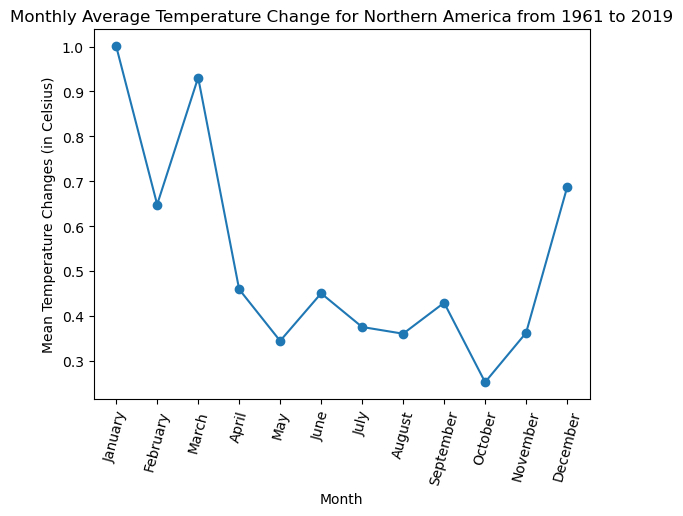

In [21]:
#plot the monthly average temperature change for North America from 1961 to 2019 (Summary of average means of mean changes by month)
yNA = m_data_naavg
xNA = range(len(yNA))


plt.plot(xNA,yNA, marker="o")
plt.xlabel('Month')
plt.ylabel("Mean Temperature Changes (in Celsius)")
plt.title("Monthly Average Temperature Change for Northern America from 1961 to 2019")

tick_locations = [value for value in xNA]
plt.xticks(tick_locations, ["January","February","March","April","May","June", 
                            "July", "August", "September", "October", "November", "December"], rotation = 75)
plt.show()

In [22]:
# North American - Mean, Median, Mode 
#m_data_na1
#Demonstrate calculating measures of central tendency
na_jan_mean_numpy = np.mean(m_data_na1['January'])
print(f"The mean temperature change for North America in the month of January is {na_jan_mean_numpy}")

na_jan_median_numpy = np.median(m_data_na1['January'])
print(f"The median temperature change for North America in the month of January is {na_jan_median_numpy}")

na_jan_mode = stats.mode(m_data_na1['January']).mode[0]
# #na_mode = pd.m_data_na1['January'].mode
print(f"The mode temperature change for North America in the month of January is {na_jan_mode}")

The mean temperature change for North America in the month of January is 1.0011333333333332
The median temperature change for North America in the month of January is 1.056
The mode temperature change for North America in the month of January is 0.699


C:\Users\wsabr\AppData\Local\Temp\ipykernel_40888\2807979022.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  na_jan_mode = stats.mode(m_data_na1['January']).mode[0]
C:\Users\wsabr\AppData\Local\Temp\ipykernel_40888\2807979022.py:10: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  na_jan_mode = stats.mode(m_data_na1['January']).mode[0]


In [24]:
na_jul_mean_numpy = np.mean(m_data_na1['July'])
print(f"The mean temperature change for North America in the month of July is {na_jul_mean_numpy}")

na_jul_median_numpy = np.median(m_data_na1['July'])
print(f"The median temperature change for North America in the month of July is {na_jul_median_numpy}")

na_jul_mode = stats.mode(m_data_na1['July']).mode[0]
print(f"The mode temperature change for North America in the month of July is {na_jul_mode}")

The mean temperature change for North America in the month of July is 0.3748833333333333
The median temperature change for North America in the month of July is 0.3345
The mode temperature change for North America in the month of July is 0.153


C:\Users\wsabr\AppData\Local\Temp\ipykernel_40888\673097717.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  na_jul_mode = stats.mode(m_data_na1['July']).mode[0]
C:\Users\wsabr\AppData\Local\Temp\ipykernel_40888\673097717.py:7: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  na_jul_mode = stats.mode(m_data_na1['July']).mode[0]


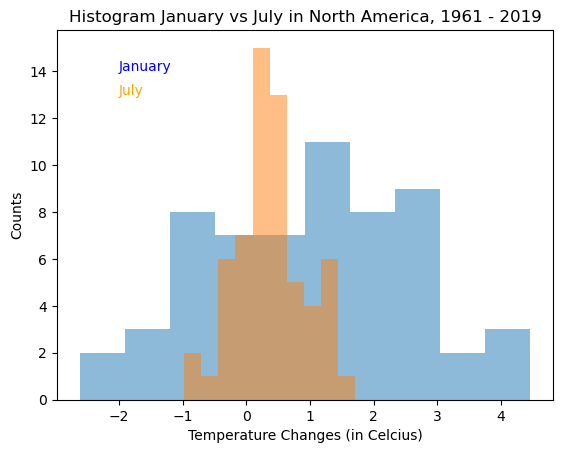

In [26]:
#Characterize the data set using matplotlib and stats.normaltest NORTH AMERICA
na_jan = m_data_na1['January']
plt.hist(na_jan, alpha =.5)
plt.title('Histogram January vs July in North America, 1961 - 2019')
plt.xlabel('Temperature Changes (in Celcius)')
plt.ylabel('Counts')
plt.annotate('January', (-2,14), color = "blue")
plt.annotate('July', (-2,13), color = "orange")


na_jul = m_data_na1['July']
plt.hist(na_jul, alpha=.5)
plt.xlabel('Temperature Changes (in Celcius)')
plt.ylabel('Counts')


#confirming object type
#print(na_jan.dtypes)

#change type from object to float
na_jan = na_jan.astype(float)
#print(na_jan.dtypes)
na_jul = na_jul.astype(float)




In [28]:
# #Null
# Ho: data is not normally distributed
# #Alternate
# Ha: data is normally distributed
    
# p-value < significance level (5%==0.05)


In [114]:
#number of data points
#print(na_jan.count())

#Will the data provide a bell shape curve when plotted? Is there a normal distribution or not?
normaltest_NA_Jan = stats.normaltest(na_jan)
print(f"The normal test result for the month of January in North America from 1961 to 2019 is {normaltest_NA_Jan}")

normaltest_NA_Jul = stats.normaltest(na_jul)
print(f"The normal test result for the month of July in North America from 1961 to 2019 is {normaltest_NA_Jul}")


The normal test result for the month of January in North America from 1961 to 2019 is NormaltestResult(statistic=0.6484222730106468, pvalue=0.7230975539708078)
The normal test result for the month of July in North America from 1961 to 2019 is NormaltestResult(statistic=0.18737526381296876, pvalue=0.9105671499462785)


In [83]:
# Demonstrate calculating the variance and standard deviation NA JANUARY
var_na_jan = np.var(na_jan, ddof = 0)
sd_na_jan = np.std(na_jan, ddof =0)
print(f"The temperature change variance for North American in the month of January is {var_na_jan}")
print(f"The temperature change standard deviation for North American in the month of January is {sd_na_jan}")

#checking that sd squared is the var
sd_na_jan**2

The temperature change variance for North American in the month of January is 2.5428929488888894
The temperature change standard deviation for North American in the month of January is 1.5946450855563095


2.5428929488888894

In [84]:
# Demonstrate calculating the variance and standard deviation NA JULY
var_na_jul =np.var(na_jul, ddof = 0)
sd_na_jul = np.std(na_jul, ddof =0)
print(f"The temperature change variance for North American in the month of July is {var_na_jul}")
print(f"The temperature change standard deviation for North American in the month of July is {sd_na_jul}")

The temperature change variance for North American in the month of July is 0.29214240305555556
The temperature change standard deviation for North American in the month of July is 0.5405019917220986


In [85]:
# Calculate the 68-95-99, 7 rule using the standard deviation
print(f"When reviewing the temperature changes in North America from 1961-2019 for January...")
print(f"Roughly 68% of the data is between {round(na_jan_mean_numpy-sd_na_jan,3)} and {round(na_jan_mean_numpy+sd_na_jan,3)}")
print(f"Roughly 95% of the data is between {round(na_jan_mean_numpy-2*sd_na_jan,3)} and {round(na_jan_mean_numpy+2*sd_na_jan,3)}")
print(f"Roughly 99.7% of the data is between {round(na_jan_mean_numpy-3*sd_na_jan,3)} and {round(na_jan_mean_numpy+3*sd_na_jan,3)}")

When reviewing the temperature changes in North America from 1961-2019 for January...
Roughly 68% of the data is between -0.594 and 2.596
Roughly 95% of the data is between -2.188 and 4.19
Roughly 99.7% of the data is between -3.783 and 5.785


In [86]:
# Calculate the 68-95-99, 7 rule using the standard deviation
print(f"When reviewing the temperature changes in North America from 1961-2019 for July...")
print(f"Roughly 68% of the data is between {round(na_jul_mean_numpy-sd_na_jul,3)} and {round(na_jul_mean_numpy+sd_na_jul,3)}")
print(f"Roughly 95% of the data is between {round(na_jul_mean_numpy-2*sd_na_jul,3)} and {round(na_jul_mean_numpy+2*sd_na_jul,3)}")
print(f"Roughly 99.7% of the data is between {round(na_jul_mean_numpy-3*sd_na_jul,3)} and {round(na_jul_mean_numpy+3*sd_na_jul,3)}")

When reviewing the temperature changes in North America from 1961-2019 for July...
Roughly 68% of the data is between -0.166 and 0.915
Roughly 95% of the data is between -0.706 and 1.456
Roughly 99.7% of the data is between -1.247 and 1.996


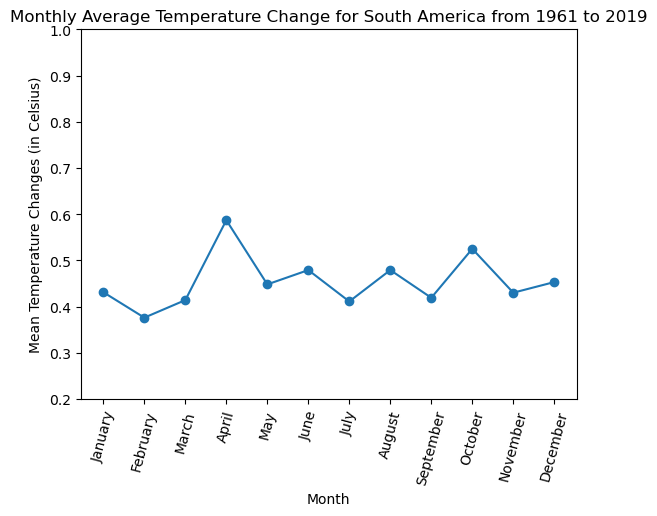

In [87]:
#plot the monthly average temperature change for South America from 1961 to 2019 (Summary of average means of mean changes by month)
ySA = m_data_saavg
xSA = range(len(ySA))


plt.plot(xSA,ySA, marker="o")
plt.xlabel('Month')
plt.ylabel("Mean Temperature Changes (in Celsius)")
plt.title("Monthly Average Temperature Change for South America from 1961 to 2019")
plt.ylim(0.2, 1.0)

tick_locations = [value for value in xSA]
plt.xticks(tick_locations, ["January","February","March","April","May","June", 
                            "July", "August", "September", "October", "November", "December"], rotation = 75)
plt.show()

In [88]:
# South American - Mean, Median, Mode - JANUARY
#m_data_sa1
#Demonstrate calculating measures of central tendency
sa_jan_mean_numpy = np.mean(m_data_sa1['January'])
print(f"The mean temperature change for South America in the month of January is {sa_jan_mean_numpy}")

sa_jan_median_numpy = np.median(m_data_sa1['January'])
print(f"The median temperature change for South America in the month of January is {sa_jan_median_numpy}")

sa_jan_mode = stats.mode(m_data_sa1['January']).mode[0]
print(f"The mode temperature change for South America in the month of January is {sa_jan_mode}")

The mean temperature change for South America in the month of January is 0.4311666666666667
The median temperature change for South America in the month of January is 0.34550000000000003
The mode temperature change for South America in the month of January is 0.178


C:\Users\wsabr\AppData\Local\Temp\ipykernel_40888\1069440200.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  sa_jan_mode = stats.mode(m_data_sa1['January']).mode[0]
C:\Users\wsabr\AppData\Local\Temp\ipykernel_40888\1069440200.py:10: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  sa_jan_mode = stats.mode(m_data_sa1['January']).mode[0]


In [89]:
# South American - Mean, Median, Mode JULY
#m_data_sa1
#Demonstrate calculating measures of central tendency
sa_jul_mean_numpy = np.mean(m_data_sa1['July'])
print(f"The mean temperature change for South America in the month of July is {sa_jul_mean_numpy}")

sa_jul_median_numpy = np.median(m_data_sa1['July'])
print(f"The median temperature change for South America in the month of July is {sa_jul_median_numpy}")

sa_jul_mode = stats.mode(m_data_sa1['July']).mode[0]
print(f"The mode temperature change for South America in the month of July is {sa_jul_mode}")

The mean temperature change for South America in the month of July is 0.41139999999999993
The median temperature change for South America in the month of July is 0.393
The mode temperature change for South America in the month of July is 0.393


C:\Users\wsabr\AppData\Local\Temp\ipykernel_40888\3021560995.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  sa_jul_mode = stats.mode(m_data_sa1['July']).mode[0]
C:\Users\wsabr\AppData\Local\Temp\ipykernel_40888\3021560995.py:10: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  sa_jul_mode = stats.mode(m_data_sa1['July']).mode[0]


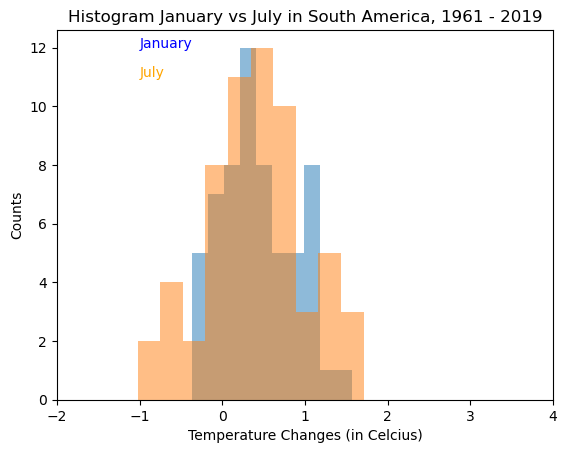

In [109]:
#Characterize the data set using matplotlib and stats.normaltest SOUTH AMERICA
sa_jan = m_data_sa1['January']
plt.hist(sa_jan, alpha =.5)
plt.title('Histogram January vs July in South America, 1961 - 2019')
plt.xlabel('Temperature Changes (in Celcius)')
plt.ylabel('Counts')
plt.annotate('January', (-1,12), color = "blue")
plt.annotate('July', (-1,11), color = "orange")

sa_jul = m_data_sa1['July']
plt.hist(sa_jul, alpha =.5)
plt.xlabel('Temperature Changes (in Celcius)')
plt.xlim(-2,4)
plt.ylabel('Counts')

#confirming object type
#print(na_jan.dtypes)

#change type from object to float
sa_jan = sa_jan.astype(float)
#print(na_jan.dtypes)
sa_jul = sa_jul.astype(float)


In [48]:
# #Null
# Ho: data is not normally distributed
# #Alternate
# Ha: data is normally distributed
    
# p-value < significance level (5%==0.05)


In [111]:
#Will the data provide a bell shape curve when plotted? Is there a normal distribution or not? SOUTH AMERICA
normaltest_SA_Jan = stats.normaltest(sa_jan)
print(f"The normal test result for the month of January in South America from 1961 to 2019 is {normaltest_SA_Jan}")

normaltest_SA_Jul = stats.normaltest(sa_jul)
print(f"The normal test result for the month of July in South America from 1961 to 2019 is {normaltest_SA_Jul}")

The normal test result for the month of January in South America from 1961 to 2019 is NormaltestResult(statistic=3.130655325843382, pvalue=0.20901951400692736)
The normal test result for the month of July in South America from 1961 to 2019 is NormaltestResult(statistic=0.06561410264193625, pvalue=0.9677252628875153)


In [115]:
# Demonstrate calculating the variance and standard deviation SOUTH AMERICA
var_sa_jan = np.var(sa_jan, ddof = 0)
sd_sa_jan = np.std(sa_jan, ddof =0)
print(f"The temperature change variance for South America in the month of January is {var_sa_jan}")
print(f"The temperature change standard deviation for South America in the month of January is {sd_sa_jan}")

#checking that sd squared is the var
#sd_sa_jan**2

The temperature change variance for South America in the month of January is 0.20940177222222223
The temperature change standard deviation for South America in the month of January is 0.45760438396307157


In [116]:
# Demonstrate calculating the variance and standard deviation SOUTH AMERICA
var_sa_jul =np.var(sa_jul, ddof = 0)
sd_sa_jul = np.std(sa_jul, ddof =0)
print(f"The temperature change variance for South America in the month of July is {var_sa_jul}")
print(f"The temperature change standard deviation for South America in the month of July is {sd_sa_jul}")

The temperature change variance for South America in the month of July is 0.38046793999999995
The temperature change standard deviation for South America in the month of July is 0.6168208329815068


In [117]:
# Calculate the 68-95-99,7 rule using the standard deviation SOUTH AMERICA
print(f"When reviewing the temperature changes in South America from 1961-2019 for January...")
print(f"Roughly 68% of the data is between {round(sa_jan_mean_numpy-sd_sa_jan,3)} and {round(sa_jan_mean_numpy+sd_sa_jan,3)}")
print(f"Roughly 95% of the data is between {round(sa_jan_mean_numpy-2*sd_sa_jan,3)} and {round(sa_jan_mean_numpy+2*sd_sa_jan,3)}")
print(f"Roughly 99.7% of the data is between {round(sa_jan_mean_numpy-3*sd_sa_jan,3)} and {round(sa_jan_mean_numpy+3*sd_sa_jan,3)}")

When reviewing the temperature changes in South America from 1961-2019 for January...
Roughly 68% of the data is between -0.026 and 0.889
Roughly 95% of the data is between -0.484 and 1.346
Roughly 99.7% of the data is between -0.942 and 1.804


In [118]:
# Calculate the 68-95-99,7 rule using the standard deviation
print(f"When reviewing the temperature changes in South America from 1961-2019 for July...")
print(f"Roughly 68% of the data is between {round(sa_jul_mean_numpy-sd_sa_jul,3)} and {round(sa_jul_mean_numpy+sd_sa_jul,3)}")
print(f"Roughly 95% of the data is between {round(sa_jul_mean_numpy-2*sd_sa_jul,3)} and {round(sa_jul_mean_numpy+2*sd_sa_jul,3)}")
print(f"Roughly 99.7% of the data is between {round(sa_jul_mean_numpy-3*sd_sa_jul,3)} and {round(sa_jul_mean_numpy+3*sd_sa_jul,3)}")

When reviewing the temperature changes in South America from 1961-2019 for July...
Roughly 68% of the data is between -0.205 and 1.028
Roughly 95% of the data is between -0.822 and 1.645
Roughly 99.7% of the data is between -1.439 and 2.262


In [119]:



#plt.xlabel('Year')
#plt.ylabel("Mean Temperature Changes (in Celsius)")
#plt.title("Average Temperature Change Per Month for Northen America from 1961 to 2019")
#plt.xticks(tick_locations, ['Y1961','Y1962','Y1963','Y1964','Y1965','Y1966','Y1967','Y1968','Y1969','Y1970','Y1971','Y1972','Y1973','Y1974','Y1975','Y1976','Y1977','Y1978','Y1979','Y1980','Y1981','Y1982','Y1983','Y1984','Y1985','Y1986','Y1987','Y1988','Y1989','Y1990','Y1991','Y1992','Y1993','Y1994','Y1995','Y1996','Y1997','Y1998','Y1999','Y2000','Y2001','Y2002','Y2003','Y2004','Y2005','Y2006','Y2007','Y2008','Y2009','Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017','Y2018','Y2019'], rotation = 75)

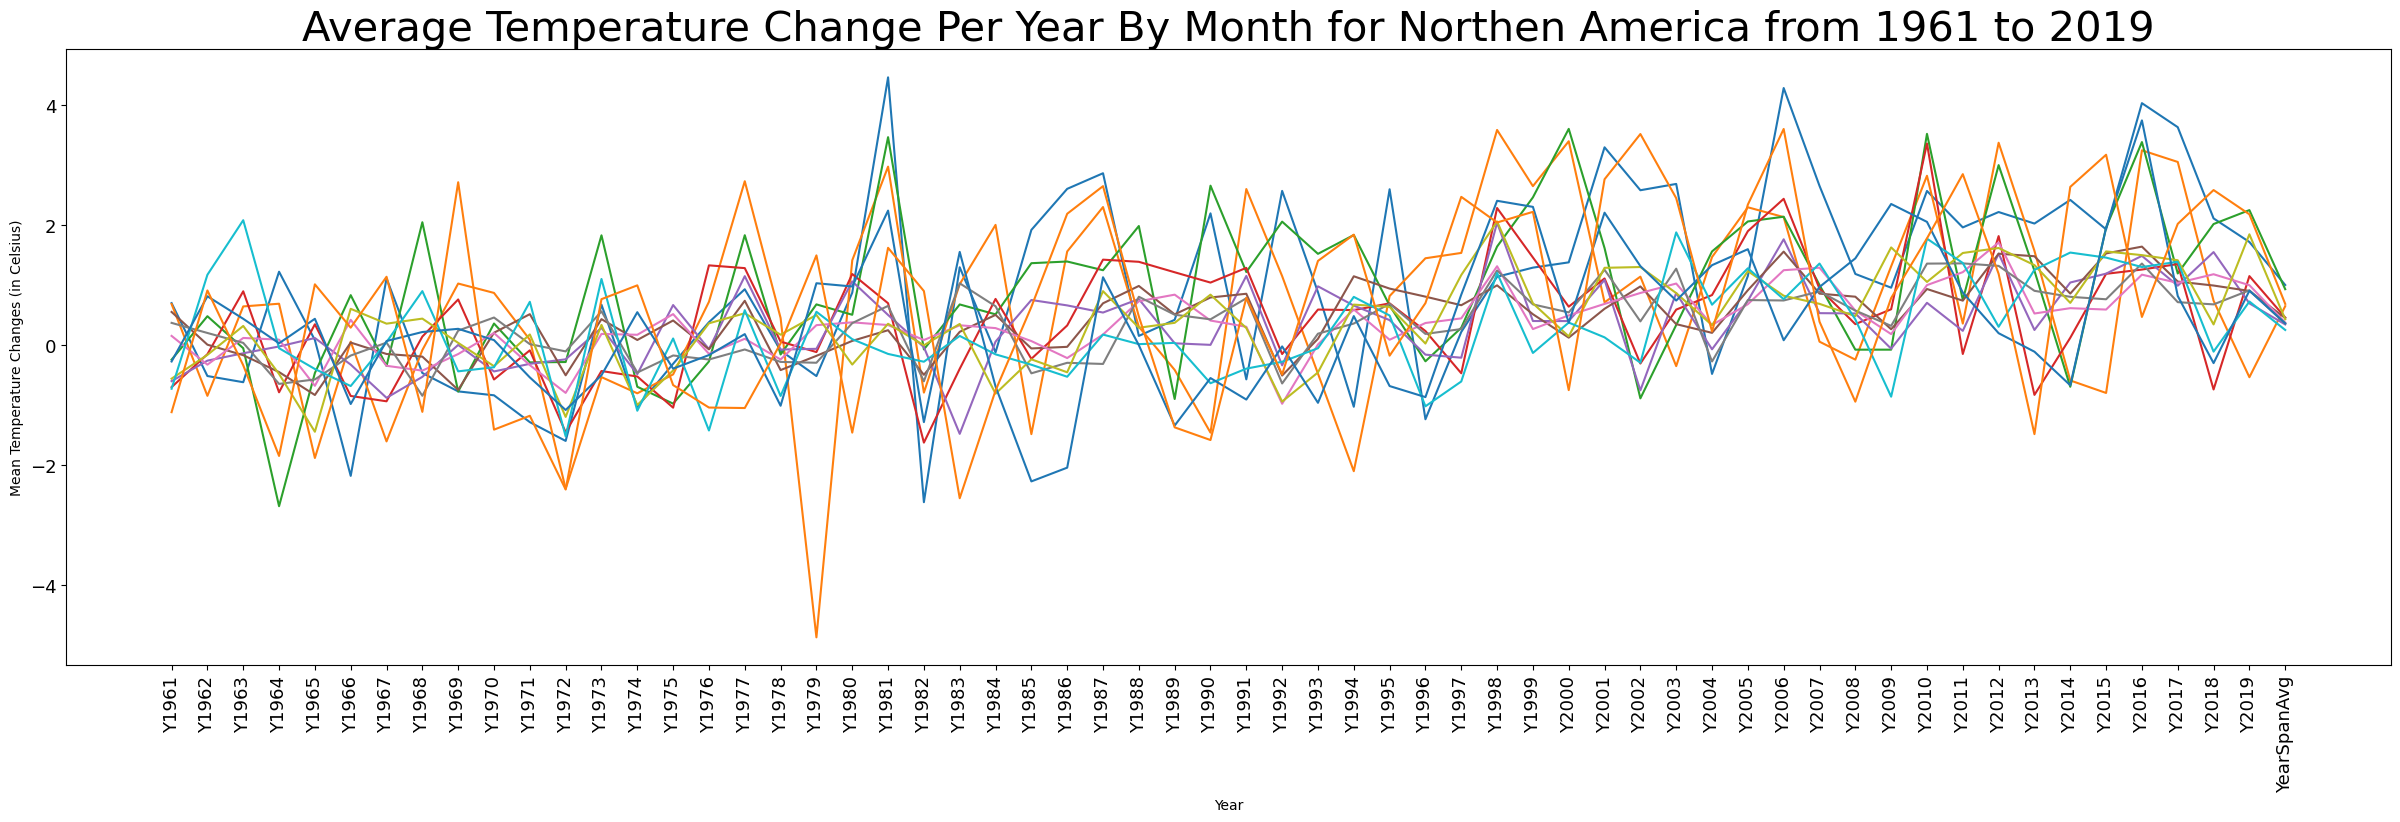

In [120]:
#Need to run these by for ideas before final. get Rid of yearSpanavg at end
fig = plt.figure(figsize=(30, 8))
plt.plot(m_data_na1["January"])
plt.plot(m_data_na1["February"])
plt.plot(m_data_na1["March"])
plt.plot(m_data_na1["April"])
plt.plot(m_data_na1["May"])
plt.plot(m_data_na1["June"])
plt.plot(m_data_na1["July"])
plt.plot(m_data_na1["August"])
plt.plot(m_data_na1["September"])
plt.plot(m_data_na1["October"])
plt.plot(m_data_na1["November"])
plt.plot(m_data_na1["December"])
plt.xlabel('Year')
plt.ylabel("Mean Temperature Changes (in Celsius)")
plt.title("Average Temperature Change Per Year By Month for Northen America from 1961 to 2019",fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

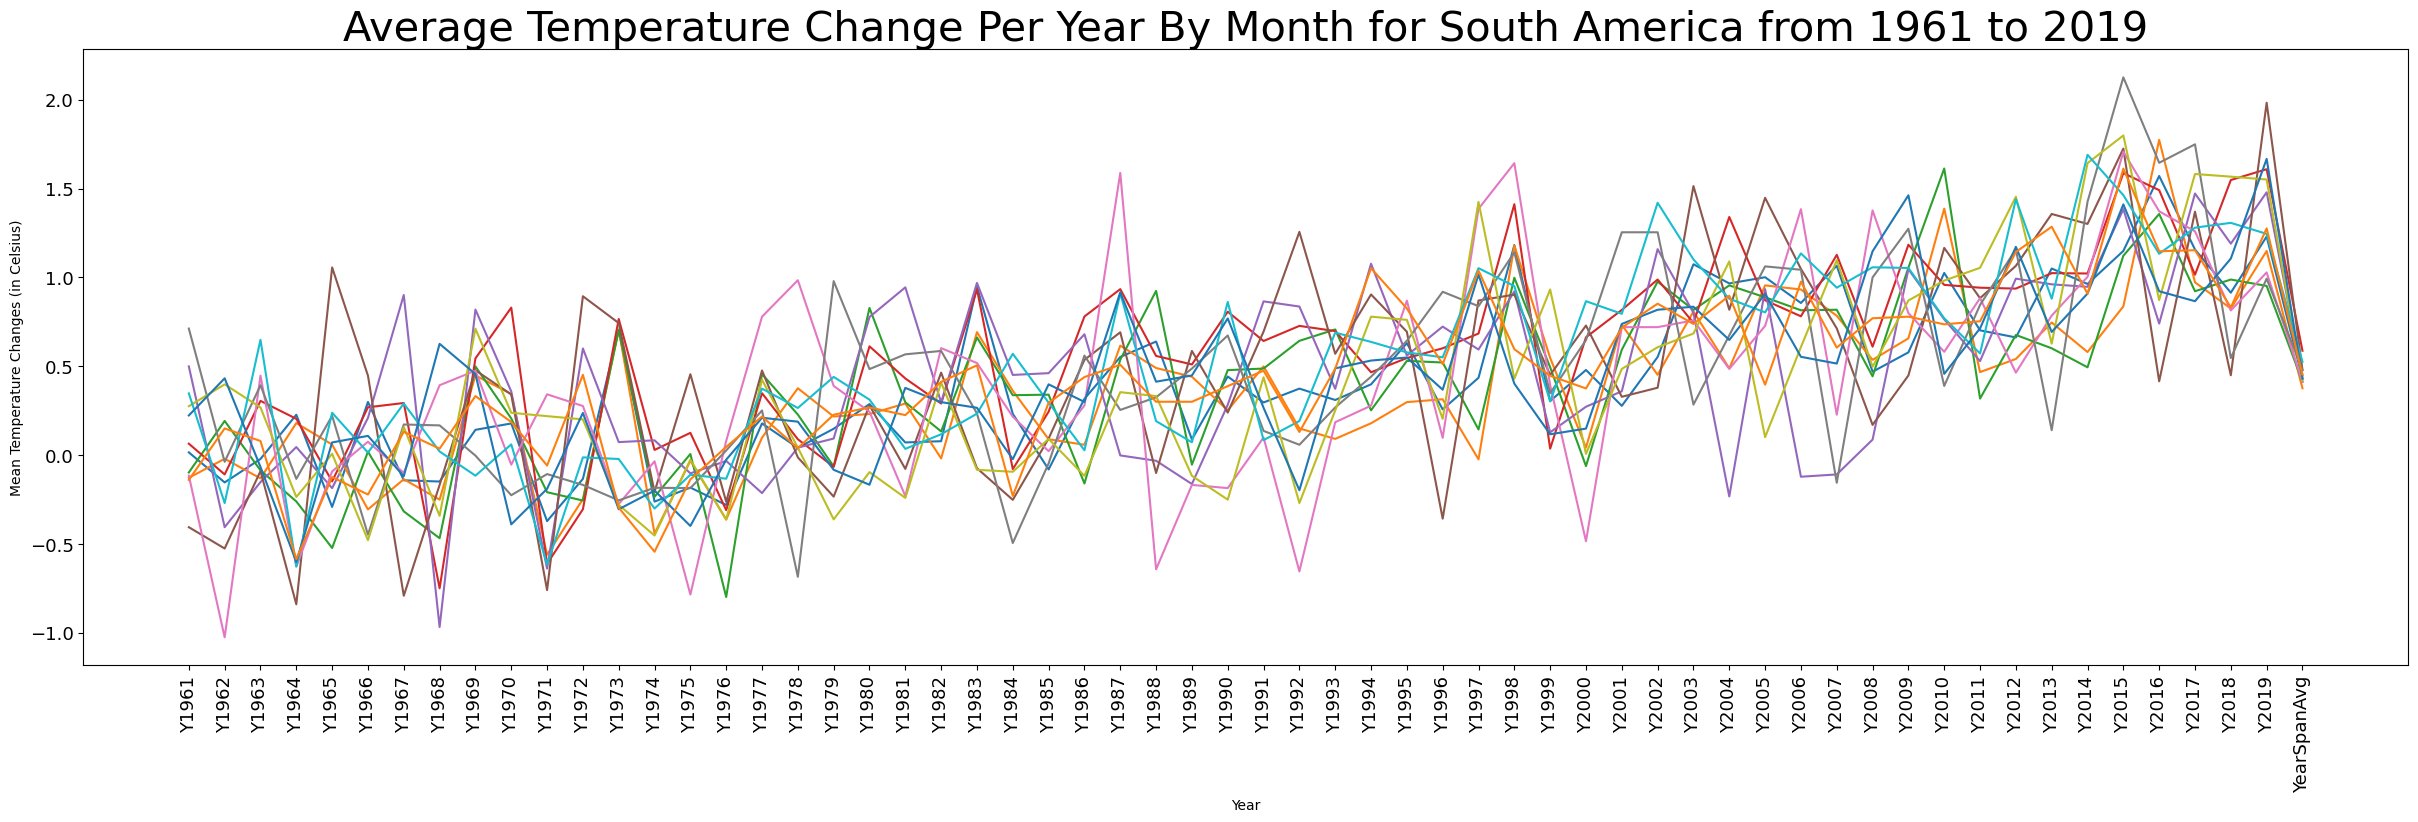

In [121]:
#Need to run these by for ideas before final. get Rid of yearSpanavg at end
fig = plt.figure(figsize=(30, 8))
plt.plot(m_data_sa1["January"])
plt.plot(m_data_sa1["February"])
plt.plot(m_data_sa1["March"])
plt.plot(m_data_sa1["April"])
plt.plot(m_data_sa1["May"])
plt.plot(m_data_sa1["June"])
plt.plot(m_data_sa1["July"])
plt.plot(m_data_sa1["August"])
plt.plot(m_data_sa1["September"])
plt.plot(m_data_sa1["October"])
plt.plot(m_data_sa1["November"])
plt.plot(m_data_sa1["December"])
plt.xlabel('Year')
plt.ylabel("Mean Temperature Changes (in Celsius)")
plt.title("Average Temperature Change Per Year By Month for South America from 1961 to 2019",fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()